#  DataScience intern at Oasis Infobyte

#  Task 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

#  NAME : SARANYA . D

# --------------------------------------------------------------------------------------------------------

# Importing some basic packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_df = pd.read_csv("C:/Users/ELCOT/Desktop/D.SARANYA/spam.csv", encoding=("ISO-8859-1"))

In [3]:
##Geting Details about the csv file uploaded##

In [4]:
print(spam_df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [5]:
print(spam_df.tail(10))

        v1                                                 v2 Unnamed: 2  \
5562   ham  Ok lor... Sony ericsson salesman... I ask shuh...        NaN   
5563   ham                                Ard 6 like dat lor.        NaN   
5564   ham  Why don't you wait 'til at least wednesday to ...        NaN   
5565   ham                                       Huh y lei...        NaN   
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...        NaN   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5562        NaN        NaN  
5563        NaN        NaN  
5564        NaN        NaN  
5565        NaN        NaN  
5566        NaN   

In [6]:
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
spam_df.drop(columns, axis = 1, inplace = True)
print(spam_df.head(10))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [7]:
spam_df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
##Checking null values

In [10]:
spam_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
##Checking duplicates##

In [12]:
spam_df.duplicated().sum()

403

In [13]:
spam_df.drop_duplicates(keep= 'first', inplace = True)
spam_df.duplicated().sum()

0

In [14]:
##Renaming##

In [15]:
spam_df.rename(columns={'v1' : 'Type', 'v2' : 'Message'}, inplace = True)
print(spam_df.head(10))

   Type                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [16]:
print(spam_df['Type'].value_counts())

ham     4516
spam     653
Name: Type, dtype: int64


In [17]:
spam_df.shape

(5169, 2)

# Data Visualization

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


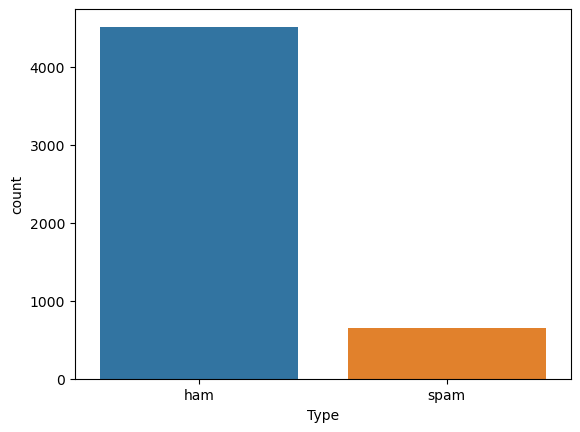

In [18]:
sns.countplot(spam_df['Type'])
plt.show()

# Data preparation 

In [19]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
spam_df['Type']=l_en.fit_transform(spam_df['Type'])
print(spam_df['Type'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Type, Length: 5169, dtype: int32


# *HAM = 0
# *SPAM = 1

In [20]:
X = spam_df['Message']
Y =spam_df['Type']

In [21]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Type, Length: 5169, dtype: int32


# Train_test_split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 3)

In [23]:
print(X_train)

4772       Ok then u tell me wat time u coming later lor.
3956                    Where is that one day training:-)
574                     Nope i waiting in sch 4 daddy... 
2279                    Sorry, I'll call later in meeting
1328     My exam is for february 4. Wish you a great day.
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Message, Length: 3463, dtype: object


In [24]:
print(Y_train)

4772    0
3956    0
574     0
2279    0
1328    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: Type, Length: 3463, dtype: int32


In [25]:
print(Y_test)

4994    0
4292    0
4128    0
4429    0
660     0
       ..
154     0
3989    1
2338    0
2329    0
3960    0
Name: Type, Length: 1706, dtype: int32


In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3463,)
(3463,)
(1706,)
(1706,)


# Converting string(Message) into integer  

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase='True')
X_train_f = feature_extraction.fit_transform(X_train)
X_test_f = feature_extraction.transform(X_test)

In [28]:
print(type(feature_extraction))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [29]:
print(X_train_f)

  (0, 3536)	0.36949506324352316
  (0, 3378)	0.38343845220796546
  (0, 1626)	0.45345260795951076
  (0, 5844)	0.33812054854020257
  (0, 6261)	0.38977371590199317
  (0, 5722)	0.37851635729014105
  (0, 4139)	0.31828508644353765
  (1, 5934)	0.8558203878945323
  (1, 1850)	0.5172731035575425
  (2, 1817)	0.5387159419630596
  (2, 5015)	0.49082256518771594
  (2, 6223)	0.4519030185050383
  (2, 4056)	0.5144531127745645
  (3, 3727)	0.5895526666147596
  (3, 3494)	0.4254738946801276
  (3, 5349)	0.4835856600533805
  (3, 3378)	0.48738539947754483
  (4, 2723)	0.3568922448949036
  (4, 6373)	0.41982011889990845
  (4, 2370)	0.5845197888819536
  (4, 2273)	0.5047638078971797
  (4, 1850)	0.3161156559604073
  (5, 2474)	0.5884604326073726
  (5, 1270)	0.5770273246293844
  (5, 3331)	0.3722340001378917
  :	:
  (3460, 238)	0.2005404340191257
  (3460, 6093)	0.1125517351286317
  (3460, 2881)	0.13488213225118983
  (3461, 4701)	0.5570288355661652
  (3461, 5723)	0.6080834787106114
  (3461, 3331)	0.3717692634371264
  (34

In [30]:
X_train.shape

(3463,)

In [31]:
print(X_test_f)

  (0, 5569)	0.452761885262234
  (0, 3853)	0.4291166163128389
  (0, 3528)	0.452761885262234
  (0, 3256)	0.21698565521819796
  (0, 2666)	0.37191817675016847
  (0, 705)	0.46953847056887166
  (1, 6262)	0.42359753574343595
  (1, 5003)	0.3567997658626682
  (1, 2099)	0.5586006593391515
  (1, 1423)	0.4750715768749877
  (1, 1109)	0.39437463790640975
  (2, 6419)	0.8036583785269349
  (2, 3217)	0.5950909263494594
  (3, 6486)	0.4846860086138022
  (3, 6106)	0.5171299736011953
  (3, 4042)	0.449335531351833
  (3, 3536)	0.3306869875999226
  (3, 1842)	0.43174038490058203
  (4, 6417)	0.23274137109965132
  (4, 5033)	0.23577967850832202
  (4, 4898)	0.5266228653139841
  (4, 4260)	0.5138900720648099
  (4, 2222)	0.5906138746616781
  (5, 2680)	0.572314128970879
  (5, 1005)	0.820034473531634
  :	:
  (1701, 1622)	0.2325026684375207
  (1702, 5651)	0.29215602753659536
  (1702, 5525)	0.2736204076559823
  (1702, 4370)	0.19309525326979723
  (1702, 3953)	0.30686857672967877
  (1702, 3738)	0.29215602753659536
  (1702, 

#  Fitting the training models 

In [32]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_f, Y_train)

LogisticRegression()

In [33]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
model2 = MultinomialNB()
model2.fit(X_train_f, Y_train)

MultinomialNB()

# Predicting

In [34]:
#Prediction using Logistic Regression

In [35]:
y_test_predicted = model.predict(X_test_f)
print(y_test_predicted.shape)
print(type(y_test_predicted))
print(Y_test.shape)
print(y_test_predicted)
print(Y_test)

(1706,)
<class 'numpy.ndarray'>
(1706,)
[0 0 0 ... 0 0 0]
4994    0
4292    0
4128    0
4429    0
660     0
       ..
154     0
3989    1
2338    0
2329    0
3960    0
Name: Type, Length: 1706, dtype: int32


In [36]:
y_train_predicted = model.predict(X_train_f)
print(y_train_predicted)
print(Y_train)

[0 0 0 ... 0 0 0]
4772    0
3956    0
574     0
2279    0
1328    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: Type, Length: 3463, dtype: int32


# Accuracy

In [37]:
#Using Logistic Regression

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy is :", accuracy_score(Y_test, y_test_predicted)*100)

Accuracy is : 95.07620164126612


In [39]:
print("Accuracy is:", accuracy_score(Y_train, y_train_predicted)*100)

Accuracy is: 95.7551256136298


In [40]:
#Prediction using MultinomialNB

In [41]:
y_test_predicted = model2.predict(X_test_f)
print(y_test_predicted.shape)
print(type(y_test_predicted))
print(Y_test.shape)
print(y_test_predicted)
print(Y_test)

(1706,)
<class 'numpy.ndarray'>
(1706,)
[0 0 0 ... 0 0 0]
4994    0
4292    0
4128    0
4429    0
660     0
       ..
154     0
3989    1
2338    0
2329    0
3960    0
Name: Type, Length: 1706, dtype: int32


In [42]:
y_train_predicted = model2.predict(X_train_f)
print(y_train_predicted)
print(Y_train)

[0 0 0 ... 0 0 0]
4772    0
3956    0
574     0
2279    0
1328    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: Type, Length: 3463, dtype: int32


# Accuracy

In [43]:
#Using MultinomialNB

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy is :", accuracy_score(Y_test, y_test_predicted)*100)

Accuracy is : 96.24853458382181


In [45]:
print("Accuracy is:", accuracy_score(Y_train, y_train_predicted)*100)

Accuracy is: 97.86312445856194


# Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import cm

In [51]:
print(confusion_matrix(Y_test, y_test_predicted))

[[1475    0]
 [  64  167]]


C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


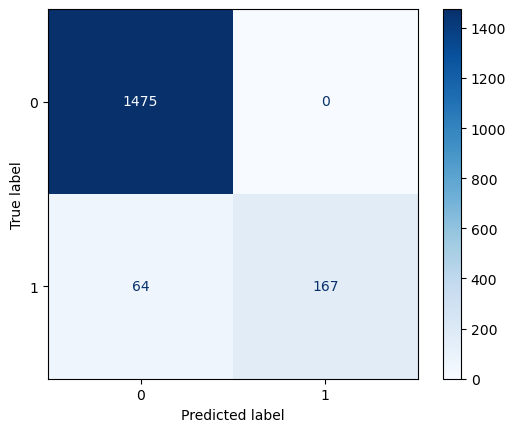

In [52]:
plot_confusion_matrix(model2,X_test_f,Y_test, cmap = plt.cm.Blues)

# K fold cross validation

This validation is used to improve the model's prediction

In [55]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model2, X_test_f, Y_test,cv = 5)

In [56]:
from sklearn.model_selection import cross_val_score
cv_s = cross_val_score(model2, X_train_f, Y_train,cv = 5)

In [57]:
print(cv_scores)

[0.93567251 0.93255132 0.92668622 0.93548387 0.92668622]


In [58]:
print("Accuracy of testing models :",cv_scores.mean())

Accuracy of testing models : 0.9314160278506629


In [59]:
print(cv_s)

[0.96681097 0.95526696 0.95238095 0.95809249 0.95375723]


In [60]:
print("Accuracy of training models :",cv_s.mean())

Accuracy of training models : 0.9572617170883067


# Checking

In [61]:
#Mail checking using Logistic Regression

In [62]:
mail = [' WINNER!! As a valued network customer you have...',' Go until jurong point, crazy.. Available only ...']

In [63]:
extract = feature_extraction.transform(mail)
print(model.predict(extract))


[0 0]


By using Logistic Regression model I got some inaccurate results---------

In [64]:
#Mail checking using MultinomialNB

In [67]:
mail = [' WINNER!! As a valued network customer you have...',' Go until jurong point, crazy.. Available only ...']

In [68]:
extract = feature_extraction.transform(mail)
print(model2.predict(extract))


[1 0]


By using MultinomialNB model , I got accurate results-------------- 

# Thus the spam and ham mails are detected

# ThankYou

# ------------------------------------------------------------------------------------------------------------